### **$$\text{EPS 109 - Midterm Exam}$$**
###  **$$\text{Tuesday, October 10, 2023}$$**

### This exam is **open book, open notes, open internet**. Please turn your **mobile phone off** and **close any chat and messaging app** on your laptop.Soliciting help chatGPT or similar platforms is not permitted but you are allowed to recycle any old code of yours. Using code from the internet is discouraged but if you do so, please insert a citation.  

 **Any calculation output and plots, that have been asked for, need to be displayed inside the notebook. We will not run your codes when we grade the exam.**

At the end, please upload your exam to bCourses as a single **well-saved** Jupyter notebook file. Since upload problems have occured with bCourses in the past, we ask you to also email a copy of your exam to wjz8597@berkeley.edu

Good luck!

## Honor code
Please retype the following pledge in the following cell and sign it: "I will not use any unauthorized aid on this exam and will not distribute its contents outside of this class any form. I will not share exam topics with class mates until 24 hours later."

In [1]:
# Your pledge and name: Simon Cha

In [61]:
#Load these libraries before proceeding.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.figsize'] = (5,5)

|**Question**  |     **Full score**     |  **Your Score**|
|:----------   |:----------------------:|---------------:|
| (1)          |    10                  |                |
| (2)          |    18                  |                |
| (3)          |    11                  |                |
| (4)          |    18                  |                |
| Total        |    57                  |                |

# Question 1: Pixel graphics again<font color="red" size="5" > (10 pts total) </font>

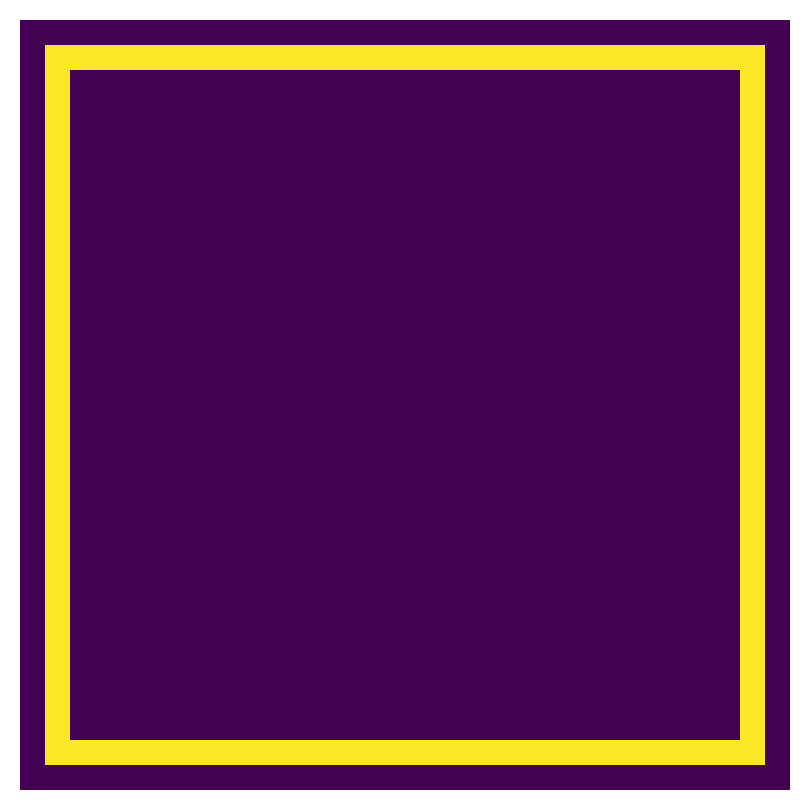

In [62]:
#If these commands do not bring up a yellow square, please reload the packages above.
n = 31
data = np.zeros((n,n))
data[1:n-2, 1 ]=1;
data[1:n-2,n-2]=1;
data[ 1 ,1:n-1]=1;
data[n-2,1:n-1]=1;
plt.imshow(data); plt.axis('off'); plt.show()

In [63]:


list(range(0,31,4))

[0, 4, 8, 12, 16, 20, 24, 28]

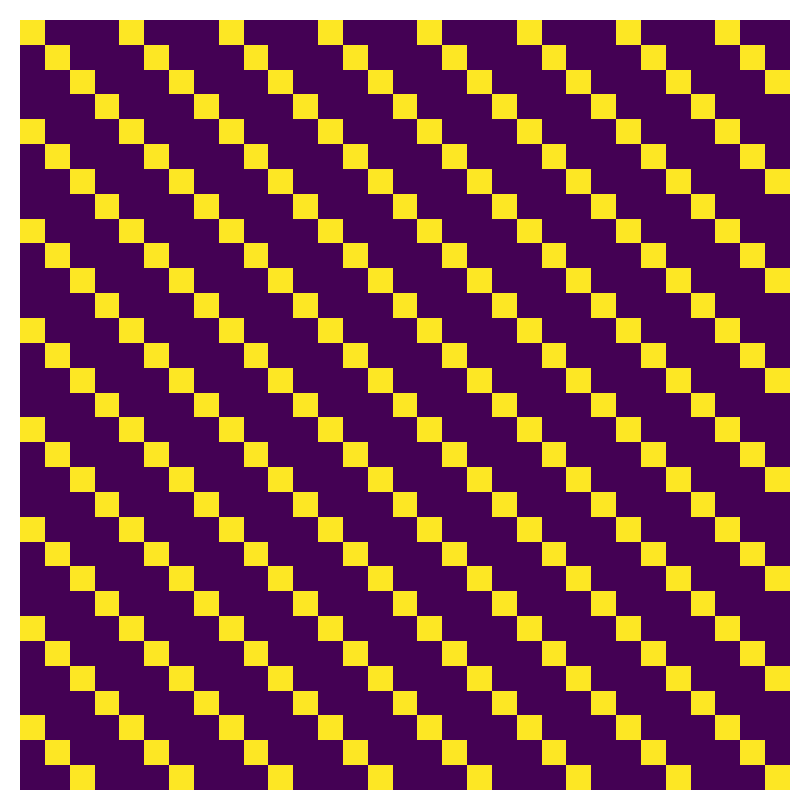

In [64]:
#Write code to generate the image below (4pts)
n = 31
data = np.zeros((n,n))

step = 0

for i in range(31):
    for j in list(range(step, 31, 4)):
        data[i, j] = 1
    if step == 3:
        step = 0
    else:
        step += 1
    

plt.imshow(data); plt.axis('off'); plt.show()

In [65]:
# We can think of it as outside the distance of the radius from the top right and bottom right corner
import math

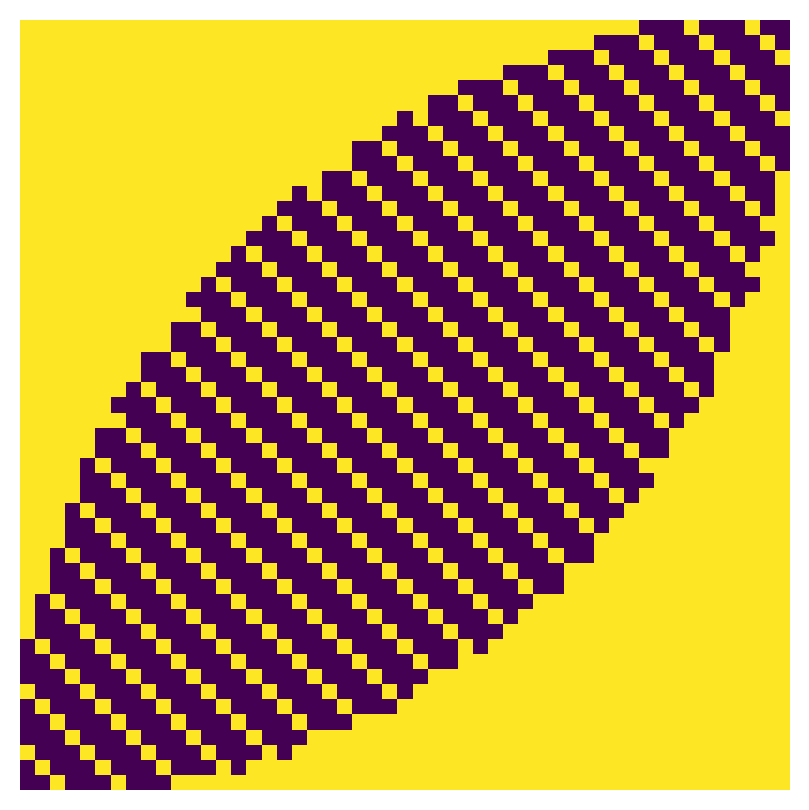

In [66]:
#Write code to generate the image below
n = 51
data = np.zeros((n,n))

step = 0

for i in range(n):
    for j in list(range(step, n, 4)):
        data[i, j] = 1
    if step == 3:
        step = 0
    else:
        step += 1
    

for i in range(n):
    for j in range(n):
        if (math.sqrt(i**2 + j**2) > 51):
            data[i,j] = 1
        if (math.sqrt((i-n)**2 + (j-n)**2) > 52):
            data[i,j] = 1


plt.imshow(data); plt.axis('off'); plt.show()

# Question 2: Map of our Earth<font color="red" size="5" > (18 pts total) </font>

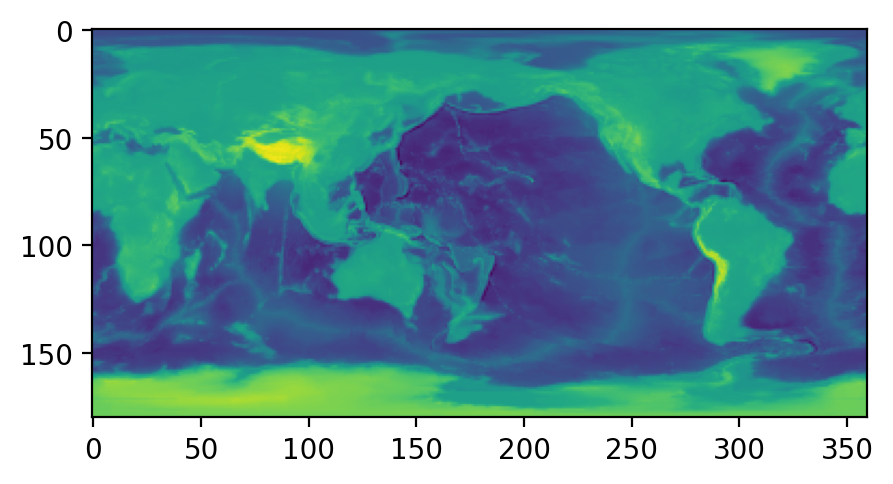

In [67]:
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
plt.show()

### Execute the three commands above that will bring up the world map that you used in week 4 to calculate the ocean volume and the area fraction that is covered by land. Assuming land is where H[i,j]>=0, modify the commands above to show a map that only has two colors: one for land and another for water (2pts)

In [68]:
H[1][1]

np.float64(-4378.0)

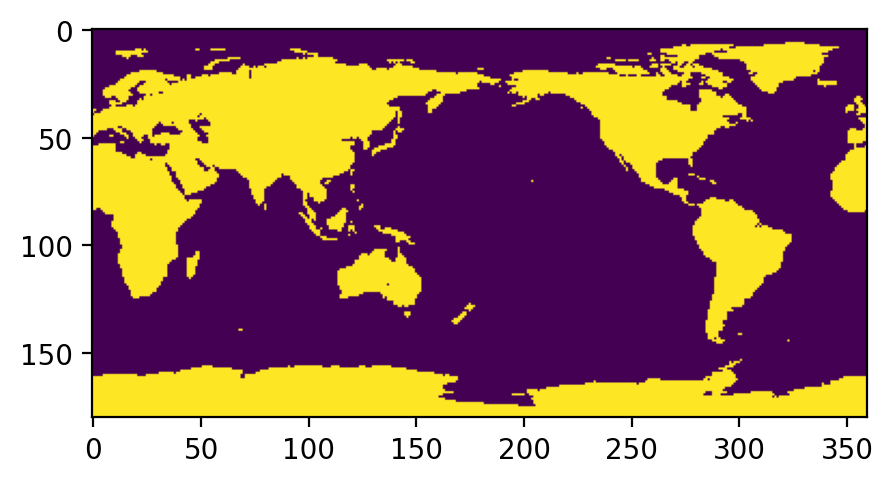

In [69]:
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if (H[i][j] > 0):
            H[i][j] = 1000
        else:
            H[i][j] = -1000

plt.imshow(H)
plt.show()

### The land fraction on the southern hemisphere is less than on the northern part of our globe. Modify your code from week 4 to calculate fraction of land on the southern hemsphere. The following cell should conclude by printing a line with 'The land fraction in the southern hemisphere is ... percent' (8pts)

In [70]:
land = 0
total = 0

for i in range(90, 180):
    for j in range(360):
        if H[i, j] == 1000:
            land += 1
            total += 1
        else:
            total += 1

print(f"The land fraction in the southern hemisphere is {np.round(land/total*100, 2)}%")

The land fraction in the southern hemisphere is 28.61%


Okay, that is wrong because that's purely a map. But we need to take into account surface area which is different for each cell due to the curvature of the Earth.

In [72]:
R = 6371000  # Earth radius in meters
ny, nx = H.shape

# Angular steps (in radians)
Lx = 2 * np.pi / nx
Ly = np.pi / ny

land = 0.0
total = 0.0

for i in range(ny // 2, ny):  # southern hemisphere
    lat = 90 - (i + 0.5) / ny * 180
    lat_rad = np.deg2rad(lat)
    for j in range(nx):
        patch = np.cos(lat_rad) * Lx * Ly
        total += patch
        if H[i, j] > 0:
            land += patch

land_fraction = land / total * 100
print(f"The land fraction in the southern hemisphere is {land_fraction:.2f}%")

The land fraction in the southern hemisphere is 18.38%


### Our map does not have a super high resolution but let's ignore this issue for now. Determine and clearly print latitude and longitude of the most northern LAND point on our map. Then calculated and print the distance in kilometers from this point to the north pole. (8pts)

In [73]:
H.shape

(180, 360)

In [79]:
# First find the most northern point. This is the x and y

x = ...
y = ...
found = False

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if (H[i][j] > 0):
            x = i
            y = j
            found = True
            break
    if found:
        break

# Now let's convert this into degrees because we need to calculate the arc length

2*np.pi*R * ((x+0.5)/360) / 1000



722.7670231896317

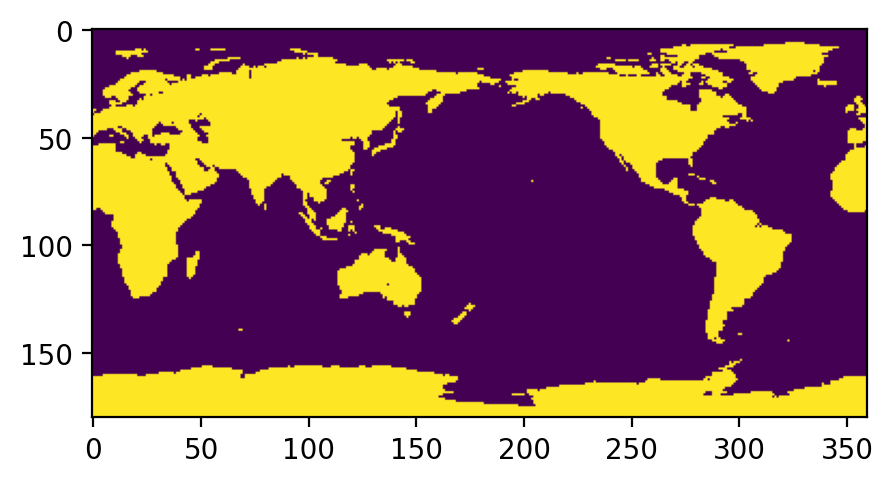

Latitude: 83.50°, Longitude: 322.00°


In [33]:
plt.imshow(H)
plt.show()

x = None
y = None
found = False

for i in range(H.shape[0]):      # loop over latitude (rows)
    for j in range(H.shape[1]):  # loop over longitude (columns)
        if H[i, j] > 0:          # found land
            x = i
            y = j
            found = True
            break                 # break out of inner loop
    if found:
        break 

lat = 90 - (x + 0.5)/180 * 180
lon = (y / 360) * 360
print(f"Latitude: {lat:.2f}°, Longitude: {lon:.2f}°")

In [37]:
# Can it be thought of as The circumference of a sphere is 2*pi*r and then we know the latitude which is a certain
# proportion of it.

quarter = 2*np.pi*R / 4
proportion = lat/90
#proportion * quarter / 1000

# Arc length formula is 2pir/360. The angle from the top is 90 - lat

2*np.pi*R*(90-lat)/360 / 1000

722.7670231896318

# Question 3: Climate Zones<font color="red" size="5" > (11 pts total) </font>

The Earth has a variety of climate zones due to the tilt of this spin axis. These climate zones have distinct temperatures and weather patterns. For the sake of this exercise, consider the following simplified climate zones:

1.   Polar
2.   Temperate
3.   Tropical
4.   Desert

A research group conducted a study and recorded the annual average temperatures (in Celsius) for 5 consecutive years in various regions within each of these climate zones.

polar_temperatures = [-15, -18, -12, -17, -14] <br> temperate_temperatures = [10, 11, 9, 12, 11] <br> tropical_temperatures = [25, 27, 26, 25, 28] <br> desert_temperatures = [35, 37, 36, 34, 38]


1. Calculate and print the five-year temperature trend for each climate zone. For simplicity, approximate the trend by the difference between the first and last value. A positive trend indicates an increase in temperature over the 5 years, a negative value indicates a decrease, and zero indicates no change. (2pts)


In [ ]:
...

2. For each climate zone, identify the year(s) when the temperature was above the five-year average for that zone. Print name the climate zone, print the year when this occurred, and the temperatures of that year. (4pts)


In [ ]:
...

3.  Calculate the variance of the temperatures for each climate zone. Variance is a measure of the spread between numbers in a data set. It is calculated using the following formula
$$ \text{Variance} = \frac{\sum (x_i - \text{mean})^2}{n-1} $$
Where $x_i$ is each individual data point, $\text{mean}$ is the average of the data set, and $n$ is the number of data points. (4pts)


In [ ]:
...

4.  Using the calculated variances, determine which climate zone shows the most variability in temperature over the five years. (1pt)

# Question 4: Growing a Christmas Tree
## We have not yet entered the Christmas season but growing trees takes some time. So we want to to reproduce the following tree graphics and will guide you trough the necessay steps. <font color="red" size="5" > (18 pts total) </font>

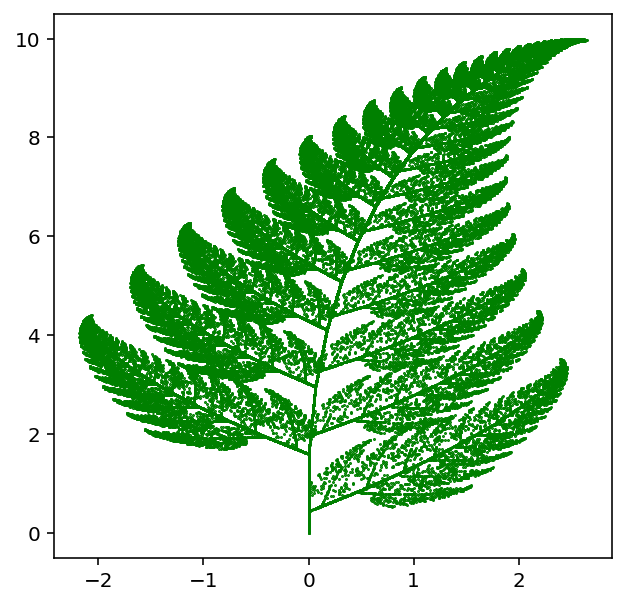

In [13]:
...

### (1) Write the following eight different Python functions f1,g1,f2,g2,f3,g3,f4,g4 that require two arguments. Everyone of the four pairs maps the arguments $(x_{n},y_{n})$ onto $(x_{n+1},y_{n+1})$. (4pts)

$$Map~1: \begin{equation}
\left\{
  \begin{aligned}
    & x_{n+1} = f_1(x_n,y_n) = 0.0 \\
    & y_{n+1} = g_1(x_n,y_n) = 0.16y_n\\
  \end{aligned}
  \right.
\end{equation}
$$

$$Map~2: \begin{equation}
\left\{
  \begin{aligned}
    & x_{n+1} = f_2(x_n,y_n) = 0.85  x_n + 0.04 y_n \\
    & y_{n+1} = g_2(x_n,y_n) = -0.04 x_n + 0.85 y_n + 1.6\\
  \end{aligned}
  \right.
\end{equation}
$$

$$Map~3: \begin{equation}
\left\{
  \begin{aligned}
    & x_{n+1} = f_3(x_n,y_n) = 0.2  x_n - 0.26 y_n \\
    & y_{n+1} = g_3(x_n,y_n) = 0.23  x_n + 0.22 y_n + 1.6\\
  \end{aligned}
  \right.
\end{equation}
$$

$$Map~4: \begin{equation}
\left\{
  \begin{aligned}
    & x_{n+1} = f_4(x_n,y_n) = -0.15  x_n + 0.28 y_n \\
    & y_{n+1} = g_4(x_n,y_n) = 0.26  x_n + 0.24 y_n + 0.44 \\
  \end{aligned}
  \right.
\end{equation}
$$

### For example, f1, f2, f3 and f4 calculate the new x values and g1, g2, g3, g4 calculate the new y values. 

In [38]:
# SOLUTION
def f1(x, y):
    return 0.0

def g1(x, y):
    return 0.16*y

def f2(x, y):
    return 0.85*x + 0.04*y

def g2(x, y):
    return -0.04*x+0.85*y+1.6

def f3(x, y):
    return 0.2*x - 0.26*y

def g3(x, y):
    return 0.23*x+0.22*y+1.6

def f4(x, y):
    return -0.15*x+0.28*y

def g4(x, y):
    return 0.26*x+0.24*y+0.44

## (2) Starting from x=0 and y=0, apply map 2 many, many times. Does the map have a stable fixed point? If it does, please print its value with a precision of ten (!) digits. (3pts)

In [46]:
x = [0]
y = [0]

for i in range(1000):
    x.append(f2(x[i], y[i]))
    y.append(g2(x[i], y[i]))

y

[0,
 1.6,
 2.96,
 4.113440000000001,
 5.089512000000001,
 5.913628496000001,
 6.607852804000002,
 7.191291372846402,
 7.680449118462482,
 8.08954941830814,
 8.430820804445155,
 8.714752633759838,
 8.950322132892989,
 9.145195243812582,
 9.305903658053577,
 9.438000342646388,
 9.546195743702265,
 9.6344767161836,
 9.706210079497312,
 9.764232544956885,
 9.8109286078627,
 9.848297847563309,
 9.878012935904245,
 9.901469519616624,
 9.919829016459998,
 9.9340552488276,
 9.944945732188232,
 9.95315833904393,
 9.959233971697182,
 9.9636157985835,
 9.966665538686021,
 9.968677216011923,
 9.96988875065772,
 9.97049170400389,
 9.97063945245536,
 9.970454026304896,
 9.970031817195396,
 9.969448328784798,
 9.968762120102971,
 9.968018069301978,
 9.9672500666468,
 9.966483229317998,
 9.96573571658165,
 9.965020211839642,
 9.964345127750619,
 9.963715581782967,
 9.963134182026822,
 9.96260165667655,
 9.962117355144512,
 9.961679644146182,
 9.961286218188366,
 9.960934340593973,
 9.960621028419558,


In [47]:
2.6556016597510403, 9.958506224066394

(2.6556016597510403, 9.958506224066394)

## (3) To generate the tree above, we need to generate 100000 points. We start again from x=0 and y=0 but in each step, we chose one of the four mapping functions at random to generate $(x_{n+1},y_{n+1})$ from $(x_{n},y_{n})$: 
## - With a probability of 5%, apply map 1.
## - With a probability of 80%, apply map 2.
## - With a probability of 10%, apply map 3.
## - Again with a probability of 5%, apply map 4.   
## Generate a list $(x_{n},y_{n})$ with 100000 points. Make an XY scatter plot with marker size 0.5. If it looks like the tree above, you have done it correctly. (11pts)

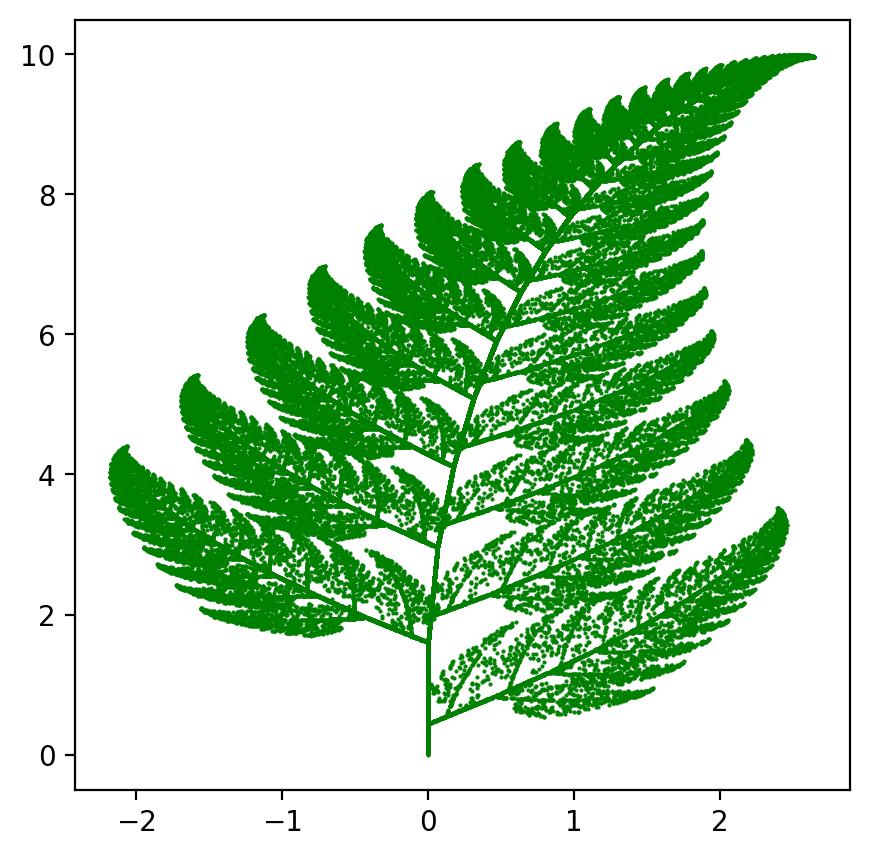

In [60]:
x = [0]
y = [0]

for i in range(100000):
    r = np.random.random()
    if r < 0.05:
        x.append(f1(x[i], y[i]))
        y.append(g1(x[i], y[i]))
    elif r < 0.85:
        x.append(f2(x[i], y[i]))
        y.append(g2(x[i], y[i]))     
    elif r < 0.95:
        x.append(f3(x[i], y[i]))
        y.append(g3(x[i], y[i]))
    else:
        x.append(f4(x[i], y[i]))
        y.append(g4(x[i], y[i]))

plt.plot(x, y, 'go', markersize=0.5)
plt.show()

# The exam ends here.